# Assignment 4

### Principle Component Regression (PCR)

In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import resample


# Consistent colors
BLUE   = '#4169E1'
RED    = '#DC143C'
GREEN  = '#228B22'
ORANGE = '#FF8C00'
TEAL   = '#4ECDC4'
PURPLE = '#800080'
GRAY   = '#888888'


In [3]:
# Open the file and read the first line
from IPython.display import display, Latex
import pandas as pd


import re
def getHeaders(file):
    with open(file, 'r') as file:
        first_line = file.readline().strip()
    features = re.findall(r'"([^"]+)"', first_line)
    return features

featuresX = getHeaders("datasets/X.txt")
featuresY = getHeaders("datasets/Y.txt")
display(Latex("Features for X"))
for i, feature in enumerate(featuresX):
    print(f"{i+1}. {feature}")

display(Latex("Features for Y"))
for i, feature in enumerate(featuresY):
    print(f"{i+1}. {feature}")


dfX = pd.read_csv("datasets/X.txt", sep=";")#, header=None)

dfY = pd.read_csv("datasets/Y.txt", sep=";")#, header=None)

display(Latex("Features for X with first 5 rows:"))
print(dfX.head())

display(Latex("Features for X with first 5 rows (using dfX.columns):"))
print(dfX.columns)
display(Latex("Features for Y with first 5 rows:"))

print(dfY.head())

display(Latex("Features for Y with first 5 rows (using dfY.columns)):"))
print(dfY.columns)

<IPython.core.display.Latex object>

1. Year
2. IsDayBin
3. Month
4. WindSpeed
5. IrrDirect
6. IrrDiffuse
7. Temperature
8. Percipitation
9. SnowFlow
10. SnowMass
11. AirDensity
12. RadSurface
13. RadTop
14. CloudCover


<IPython.core.display.Latex object>

1. WindPower
2. PVPower


<IPython.core.display.Latex object>

    Year IsDayBin  Month  WindSpeed  IrrDirect  IrrDiffuse  Temperature  \
R1  2016    Night      1      5.777        0.0         0.0       -1.210   
R2  2016    Night      1      5.887        0.0         0.0       -0.862   
R3  2016    Night      1      5.957        0.0         0.0       -0.552   
R4  2016    Night      1      6.025        0.0         0.0       -0.297   
R5  2016    Night      1      6.101        0.0         0.0       -0.149   

    Percipitation  SnowFlow  SnowMass  AirDensity  RadSurface  RadTop  \
R1          0.114     0.099    10.592       1.268         0.0     0.0   
R2          0.114     0.103    10.671       1.266         0.0     0.0   
R3          0.122     0.111    10.756       1.265         0.0     0.0   
R4          0.158     0.145    10.855       1.264         0.0     0.0   
R5          0.164     0.081    10.884       1.263         0.0     0.0   

    CloudCover  
R1         1.0  
R2         1.0  
R3         1.0  
R4         1.0  
R5         1.0  


<IPython.core.display.Latex object>

Index(['Year', 'IsDayBin', 'Month', 'WindSpeed', 'IrrDirect', 'IrrDiffuse',
       'Temperature', 'Percipitation', 'SnowFlow', 'SnowMass', 'AirDensity',
       'RadSurface', 'RadTop', 'CloudCover'],
      dtype='object')


<IPython.core.display.Latex object>

    WindPower  PVPower
R1    396.352      0.0
R2    417.778      0.0
R3    434.581      0.0
R4    448.482      0.0
R5    465.790      0.0


<IPython.core.display.Latex object>

Index(['WindPower', 'PVPower'], dtype='object')


#### Problem 1b)

The variable IsDayBin is categorical ($Day$ or $Night$). Explain how you are going to
deal with this variable.

I guess the best way to handle it as a dummy variable. That means to convert every $Day$ to $1$ and every $Night$ to $0$.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#Converting to dummy Binary (1 or 0) variables

dfX = pd.read_csv("datasets/X.txt", sep=";")#, header=None)
dfY = pd.read_csv("datasets/Y.txt", sep=";")#, header=None)

print(dfX["IsDayBin"].values)
print(len(dfX["IsDayBin"].values))



#Could also easily have used the map command.
#X['IsDayBin'].= X['IsDayBin'].map({'Day': 1, 'Night': 0})
for i in range(len(dfX["IsDayBin"].values)):
    if dfX["IsDayBin"].values[i] == "Night":
        dfX["IsDayBin"].values[i] = 0
    else:
        dfX["IsDayBin"].values[i] = 1


#Converting to Binary:
print(dfX["IsDayBin"].values)

# https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler
display(Latex(rf"StandardScaler() will normalize the features i.e. each column of X, INDIVIDUALLY, so that each column/feature/variable will have $\mu = 0$ and $\sigma = 1$"))



display(Latex(rf"Before transformation:"))
print(dfX.head())

#is this appropiate for dummy variable?

scaler = StandardScaler()

XScaled = pd.DataFrame(scaler.fit_transform(dfX), columns=dfX.columns)
#z = (x-\mu) / \sigma
display(Latex(rf"After transformation  ($z=\frac{{x-\mu}}{{\sigma}} $): "))
print(XScaled.head())


['Night' 'Night' 'Night' ... 'Night' 'Night' 'Night']
26304
[0 0 0 ... 0 0 0]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

    Year IsDayBin  Month  WindSpeed  IrrDirect  IrrDiffuse  Temperature  \
R1  2016        0      1      5.777        0.0         0.0       -1.210   
R2  2016        0      1      5.887        0.0         0.0       -0.862   
R3  2016        0      1      5.957        0.0         0.0       -0.552   
R4  2016        0      1      6.025        0.0         0.0       -0.297   
R5  2016        0      1      6.101        0.0         0.0       -0.149   

    Percipitation  SnowFlow  SnowMass  AirDensity  RadSurface  RadTop  \
R1          0.114     0.099    10.592       1.268         0.0     0.0   
R2          0.114     0.103    10.671       1.266         0.0     0.0   
R3          0.122     0.111    10.756       1.265         0.0     0.0   
R4          0.158     0.145    10.855       1.264         0.0     0.0   
R5          0.164     0.081    10.884       1.263         0.0     0.0   

    CloudCover  
R1         1.0  
R2         1.0  
R3         1.0  
R4         1.0  
R5         1.0  


<IPython.core.display.Latex object>

       Year  IsDayBin     Month  WindSpeed  IrrDirect  IrrDiffuse  \
0 -1.223349 -1.093127 -1.601021   0.047997  -0.560808    -0.68359   
1 -1.223349 -1.093127 -1.601021   0.114114  -0.560808    -0.68359   
2 -1.223349 -1.093127 -1.601021   0.156188  -0.560808    -0.68359   
3 -1.223349 -1.093127 -1.601021   0.197060  -0.560808    -0.68359   
4 -1.223349 -1.093127 -1.601021   0.242741  -0.560808    -0.68359   

   Temperature  Percipitation  SnowFlow  SnowMass  AirDensity  RadSurface  \
0    -0.691798       0.020353  0.547547 -0.123141    0.934608   -0.619738   
1    -0.653622       0.020353  0.578822 -0.120737    0.887231   -0.619738   
2    -0.619615       0.047918  0.641374 -0.118151    0.863543   -0.619738   
3    -0.591642       0.171960  0.907217 -0.115139    0.839855   -0.619738   
4    -0.575406       0.192633  0.406806 -0.114257    0.816166   -0.619738   

     RadTop  CloudCover  
0 -0.740415    1.089909  
1 -0.740415    1.089909  
2 -0.740415    1.089909  
3 -0.740415    1.0

                   Year  IsDayBin     Month  WindSpeed  IrrDirect  IrrDiffuse  \
Year           1.000000  0.000567  0.001465  -0.019028   0.031025   -0.013013   
IsDayBin       0.000567  1.000000 -0.047886  -0.143975   0.513031    0.625353   
Month          0.001465 -0.047886  1.000000   0.068069  -0.055484   -0.057556   
WindSpeed     -0.019028 -0.143975  0.068069   1.000000  -0.171590   -0.125900   
IrrDirect      0.031025  0.513031 -0.055484  -0.171590   1.000000    0.534888   
IrrDiffuse    -0.013013  0.625353 -0.057556  -0.125900   0.534888    1.000000   
Temperature   -0.000815  0.402599  0.212559  -0.036829   0.442759    0.518845   
Percipitation -0.015914 -0.004233  0.043750   0.152624  -0.172743   -0.012991   
SnowFlow       0.029840 -0.093446 -0.072364   0.085922  -0.123765   -0.122560   
SnowMass       0.329881 -0.104280 -0.390397  -0.044389  -0.099976   -0.147102   
AirDensity     0.012879 -0.306677 -0.205648  -0.062371  -0.301353   -0.408807   
RadSurface     0.018848  0.5

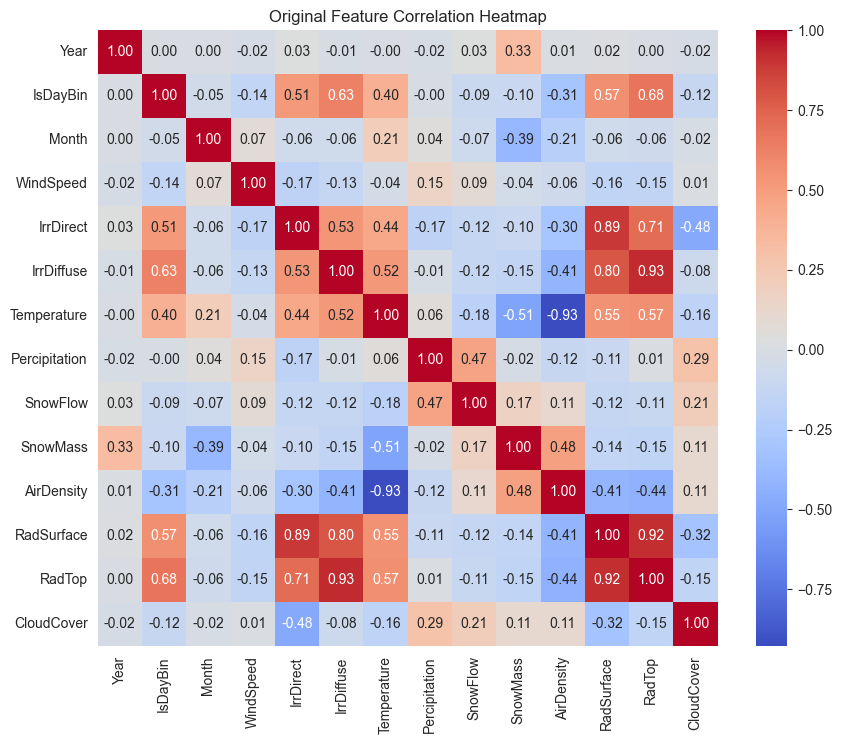

In [5]:

#dfX = dfX.astype(float)
plt.figure(figsize=(10, 8))
# Compute correlation matrix
corr = XScaled.corr()
print(corr)
# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Original Feature Correlation Heatmap")
plt.show()

In the correlation matrix we look for high off-diagonal absolute values.
Which indicate strong correlation (That they share much information).

If all correlations are near 0, the varables are independent and the principle component analysys will not be good at reducing demensions.

In [6]:
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)


corr_values = corr.where(mask)
strong_corr_pairs = []
for i in range(len(corr_values.columns)):
    for j in range(len(corr_values.columns)):
        if corr_values.iloc[i, j] is not None and corr_values.iloc[i, j] > 0.8:
            strong_corr_pairs.append((corr_values.columns[i],
                                     corr_values.columns[j],
                                     corr_values.iloc[i, j]))

# Display the top 3 strongest correlations (or all if less than 3)
for i, (var1, var2, corr) in enumerate(strong_corr_pairs[:3], 1):
    print(f"{i}. {var1} and {var2}: r = {corr:.3f}")

1. IrrDirect and RadSurface: r = 0.889
2. IrrDiffuse and RadTop: r = 0.927
3. RadSurface and RadTop: r = 0.920


### Problem 2

In [7]:
print("Problem 2b)")
X = XScaled.copy()
y_wind = dfY['WindPower'].values
y_pv   = dfY['PVPower'].values

ordLinRegWind = LinearRegression().fit(X, y_wind)
ordLinRegPv = LinearRegression().fit(X, y_pv)

print(fr"MLR result:")
display(Latex(rf"Linear Regression Result $R^2$:"))

display(Latex(rf"Windpower $R^2$:{r2_score(y_wind, ordLinRegWind.predict(X))}"))
display(Latex(rf"PVPower $R^2$=:{r2_score(y_pv, ordLinRegPv.predict(X))}"))


Problem 2b)
MLR result:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### Problem 2d)
Bootstrap is a statistical method that can be used to construct confidence
intervals by random sampling with replacement.

In order to construct a confidence interval for an unknown parameter, it is
necessary to know how far the estimator is likely to deviate from the
parameter.

The basic idea of the bootstrap is to look at how much the estimator
fluctuates when in it is computed on resampled versions of the original
data.


Source: https://rtg.ucdavis.edu/sites/g/files/dgvnsk4646/files/media/documents/Chen-PCAAndBootstrap-small.pdf

Bootstrapping complete. Samples collected:  200

Coefficient summary statistics:
WindPower coefficients - mean:
Year               0.760938
IsDayBin           0.400719
Month              0.416588
WindSpeed        324.497449
IrrDirect          4.684329
IrrDiffuse         3.201871
Temperature       -3.362125
Percipitation      3.289455
SnowFlow          -0.965594
SnowMass           1.246393
AirDensity        -5.392128
RadSurface        -6.202351
RadTop             6.312730
CloudCover        -2.004072
dtype: float64

WindPower coefficients - std dev:
Year             0.457456
IsDayBin         0.625612
Month            0.425391
WindSpeed        0.678526
IrrDirect        1.592332
IrrDiffuse       1.384883
Temperature      1.334529
Percipitation    0.582744
SnowFlow         0.601449
SnowMass         0.537692
AirDensity       1.163931
RadSurface       2.623403
RadTop           2.490646
CloudCover       0.479674
dtype: float64


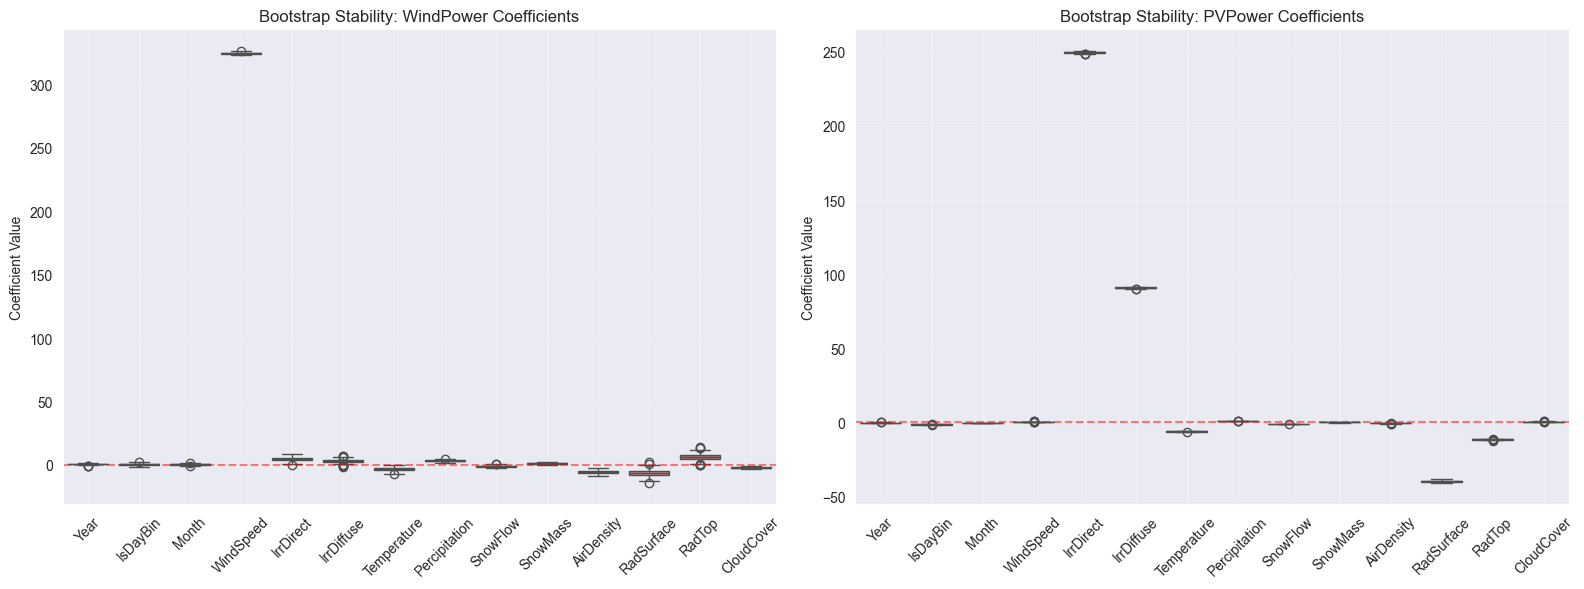


Condition number of X^T X: 266.81


In [8]:
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
nIterations = 200
windCoefsList = []
pvCoefsList = []
n_samples = len(X)

# Perform Bootstrap - Option 1 (using indices)
for i in range(nIterations):
    indices = np.random.choice(n_samples, n_samples, replace=True)

    XBoot = X.iloc[indices]
    yWindBoot = y_wind[indices]
    yPvBoot = y_pv[indices]

    windModelBoot = LinearRegression().fit(XBoot, yWindBoot)
    pvModelBoot = LinearRegression().fit(XBoot, yPvBoot)

    windCoefsList.append(windModelBoot.coef_)
    pvCoefsList.append(pvModelBoot.coef_)

# Convert lists to DataFrames for easy plotting
dfWindCoefs = pd.DataFrame(windCoefsList, columns=X.columns)
dfPvCoefs = pd.DataFrame(pvCoefsList, columns=X.columns)

print("Bootstrapping complete. Samples collected: ", len(dfWindCoefs))
print("\nCoefficient summary statistics:")
print("WindPower coefficients - mean:")
print(dfWindCoefs.mean())
print("\nWindPower coefficients - std dev:")
print(dfWindCoefs.std())


fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data=dfWindCoefs, ax=axes[0], palette="vlag")
axes[0].axhline(0, color='red', linestyle='--', alpha=0.5)
axes[0].set_title("Bootstrap Stability: WindPower Coefficients")
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel("Coefficient Value")
axes[0].grid(True, alpha=0.3)
sns.boxplot(data=dfPvCoefs, ax=axes[1], palette="vlag")
axes[1].axhline(0, color='red', linestyle='--', alpha=0.5)
axes[1].set_title("Bootstrap Stability: PVPower Coefficients")
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel("Coefficient Value")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

XTX = X.T @ X
cond_number = np.linalg.cond(XTX)
print(f"\nCondition number of X^T X: {cond_number:.2f}")

### Question 3

In [9]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X)

T = pca.transform(X)  # scores
P = pca.components_    # loadings (rows = PCs)


#returns an array showing the percentage of the total dataset variance captured by each principal component
expl_var = pca.explained_variance_ratio_

#calculates the cumulative sum of elements in a NumPy array along a specified axis
cum_var  = np.cumsum(expl_var)

nFeatures = len(X.columns)

fig = make_subplots(rows=1, cols=2, subplot_titles=['Scree Plot', 'Cumulative Variance'])

fig.add_trace(go.Bar(
    x=list(range(1, nFeatures+1)), y=expl_var * 100,
    marker_color=BLUE,
    text=[f'{v:.1f}%' for v in expl_var[:5]*100] + [''] * (nFeatures - 5),
    textposition='outside', showlegend=False
), row=1, col=1)

# Cumulative variance
fig.add_trace(go.Scatter(
    x=list(range(1, nFeatures+1)), y=cum_var * 100,
    mode='lines+markers', marker=dict(color=BLUE, size=8),
    showlegend=False
), row=1, col=2)

fig.add_hline(y=60, line_dash='dash', line_color=RED, line_width=1,
              row=1, col=2, annotation_text='60%')
fig.add_hline(y=90, line_dash='dash', line_color=ORANGE, line_width=1,
              row=1, col=2, annotation_text='90%')

fig.add_trace(go.Scatter(
    x=[3], y=[cum_var[2]*100], mode='markers',
    marker=dict(color=RED, size=14, symbol='circle-open', line=dict(width=3)),
    showlegend=False
), row=1, col=2)
fig.add_annotation(x=3, y=cum_var[2]*100, text=f'k=3 → {cum_var[2]*100:.1f}%',
                   xshift=80, font=dict(color=RED, size=12),
                   showarrow=True, arrowhead=2, arrowcolor=RED,
                   row=1, col=2)

fig.update_xaxes(title_text='Principal Component', dtick=1, row=1, col=1)
fig.update_xaxes(title_text='Number of PCs', dtick=1, row=1, col=2)
fig.update_yaxes(title_text='Variance Explained (%)', row=1, col=1)
fig.update_yaxes(title_text='Cumulative Variance Explained (%)', row=1, col=2)
fig.update_layout(height=450, width=1050)
fig.show()

print('Explained variance per PC:')
for i in range(nFeatures):
    print(f'  PC{i+1:>2d}: {expl_var[i]*100:5.1f}%   (cumulative: {cum_var[i]*100:5.1f}%)')

Explained variance per PC:
  PC 1:  34.7%   (cumulative:  34.7%)
  PC 2:  14.2%   (cumulative:  48.9%)
  PC 3:  11.9%   (cumulative:  60.8%)
  PC 4:   7.8%   (cumulative:  68.6%)
  PC 5:   7.2%   (cumulative:  75.7%)
  PC 6:   6.2%   (cumulative:  81.9%)
  PC 7:   5.4%   (cumulative:  87.3%)
  PC 8:   3.6%   (cumulative:  90.9%)
  PC 9:   3.2%   (cumulative:  94.2%)
  PC10:   2.7%   (cumulative:  96.9%)
  PC11:   2.3%   (cumulative:  99.2%)
  PC12:   0.4%   (cumulative:  99.6%)
  PC13:   0.3%   (cumulative:  99.9%)
  PC14:   0.1%   (cumulative: 100.0%)


### Problem 4 (Principle component regression with r = 3)

In [12]:
###
k = 3
# scores
Tk = T[:,:k]

pcrWind = LinearRegression()
pcrWind.fit(Tk, y_wind)
pcrPv = LinearRegression()
pcrPv.fit(Tk, y_pv)


yPredWindPcr = pcrWind.predict(Tk)
yPredPvPcr = pcrPv.predict(Tk)

r2WindPcr = r2_score(y_wind, yPredWindPcr)
r2PvPcr = r2_score(y_pv, yPredPvPcr)

rmseWindPcr = np.sqrt(mean_squared_error(y_wind, yPredWindPcr))
rmsePvPcr = np.sqrt(mean_squared_error(y_pv, yPredPvPcr))

display(Latex(rf" PCR Results ($k=3$):"))
display(Latex(rf"WindPower $R^2$: {r2WindPcr:.4f} | RMSE: {rmseWindPcr:.4f}"))
display(Latex(rf"PVPower $R^2$: {r2PvPcr:.4f} | RMSE: {rmsePvPcr:.4f}"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [20]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import r2_score

# 1. Gather the R2 values from your previous MLR and PCR results
r2_wind_ols = r2_score(y_wind, ordLinRegWind.predict(X))
r2_pv_ols   = r2_score(y_pv, ordLinRegPv.predict(X))



# --- Compare MLR vs PCR(k=3) ---
methods = ['MLR', f'PCR (k={k})']
r2_wind = [r2_wind_ols, r2WindPcr]
r2_pv   = [r2_pv_ols,   r2PvPcr]


fig = make_subplots(rows=1, cols=2, subplot_titles=['WindPower', 'PVPower'])

fig.add_trace(go.Bar(x=methods, y=r2_wind, marker_color=[GREEN, BLUE],
    text=[f'{v:.4f}' for v in r2_wind], textposition='outside',
    showlegend=False), row=1, col=1)
fig.add_trace(go.Bar(x=methods, y=r2_pv, marker_color=[GREEN, ORANGE],
    text=[f'{v:.4f}' for v in r2_pv], textposition='outside',
    showlegend=False), row=1, col=2)

fig.update_yaxes(range=[0, 1.15], title_text='R²')
fig.update_layout(height=450, width=850,
    title_text=f'MLR vs PCR (k={k}): Same components, very different results!',
    title_font_size=15)
fig.show()

fig = make_subplots(rows=1, cols=2,
    subplot_titles=[f'PCR (k={k}) — WindPower  |  R² = {r2WindPcr:.4f}',
                    f'PCR (k={k}) — PVPower  |  R² = {r2PvPcr:.4f}'])
n_plot = 5000
rng = np.random.default_rng(42)
idx_plot = rng.choice(len(y_wind), size=n_plot, replace=False)

fig.add_trace(go.Scattergl(x=y_wind[idx_plot], y=yPredWindPcr[idx_plot],
    mode='markers', marker=dict(color=BLUE, size=3, opacity=0.2),
    showlegend=False, hovertemplate='Actual: %{x:.1f}<br>Predicted: %{y:.1f}<extra></extra>'
), row=1, col=1)
fig.add_trace(go.Scatter(x=[0, y_wind.max()], y=[0, y_wind.max()],
    mode='lines', line=dict(color='black', dash='dash'), showlegend=False
), row=1, col=1)

fig.add_trace(go.Scattergl(x=y_pv[idx_plot], y=yPredPvPcr[idx_plot],
    mode='markers', marker=dict(color=ORANGE, size=3, opacity=0.2),
    showlegend=False, hovertemplate='Actual: %{x:.1f}<br>Predicted: %{y:.1f}<extra></extra>'
), row=1, col=2)
fig.add_trace(go.Scatter(x=[0, y_pv.max()], y=[0, y_pv.max()],
    mode='lines', line=dict(color='black', dash='dash'), showlegend=False
), row=1, col=2)

fig.update_xaxes(title_text='Actual WindPower', row=1, col=1)
fig.update_yaxes(title_text='Predicted WindPower', row=1, col=1)
fig.update_xaxes(title_text='Actual PVPower', row=1, col=2)
fig.update_yaxes(title_text='Predicted PVPower', row=1, col=2)
fig.update_layout(height=500, width=1050)
fig.show()

print(f'Summary:')
print(f'  PVPower:   PCR(k={k}) gives R² = {r2PvPcr:.4f}  ')
print("This is good" if r2PvPcr > 0.7 else "This is terrible")

print(f'  WindPower: PCR(k={k}) gives R² = {r2WindPcr:.4f}')
print("This is good" if r2WindPcr > 0.7 else "This is terrible")
#print(f"The results are {'good' if score > 5 else 'terrible'}!"
print(f'  Meanwhile, MLR gave R² = {r2_wind_ols:.4f} for WindPower.')
print(f'  Why does the same PCR model work for one response but fail for the other?')

Summary:
  PVPower:   PCR(k=3) gives R² = 0.8530  
This is good
  WindPower: PCR(k=3) gives R² = 0.1301
This is terrible
  Meanwhile, MLR gave R² = 0.9588 for WindPower.
  Why does the same PCR model work for one response but fail for the other?
